Copyright © [2024] [ Saeed Babagolzadeh & Hamed Jamshidi ]

Feel free to use this content, provided you properly this GitHub repository:
 [MrGolzadeh's GitHub repository](https://github.com/MrGolzadeh/MrGolzadeh). For more details, see the [Creative Commons BY license.](https://creativecommons.org/licenses/by/4.0/)

# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# **Download Dataset**

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 144MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [5]:
# load above downloaded file
import pandas as pd

df = pd.read_csv(path + '/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis (EDA):


1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features

.
.
.


In [6]:
# Display summary statistics for the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


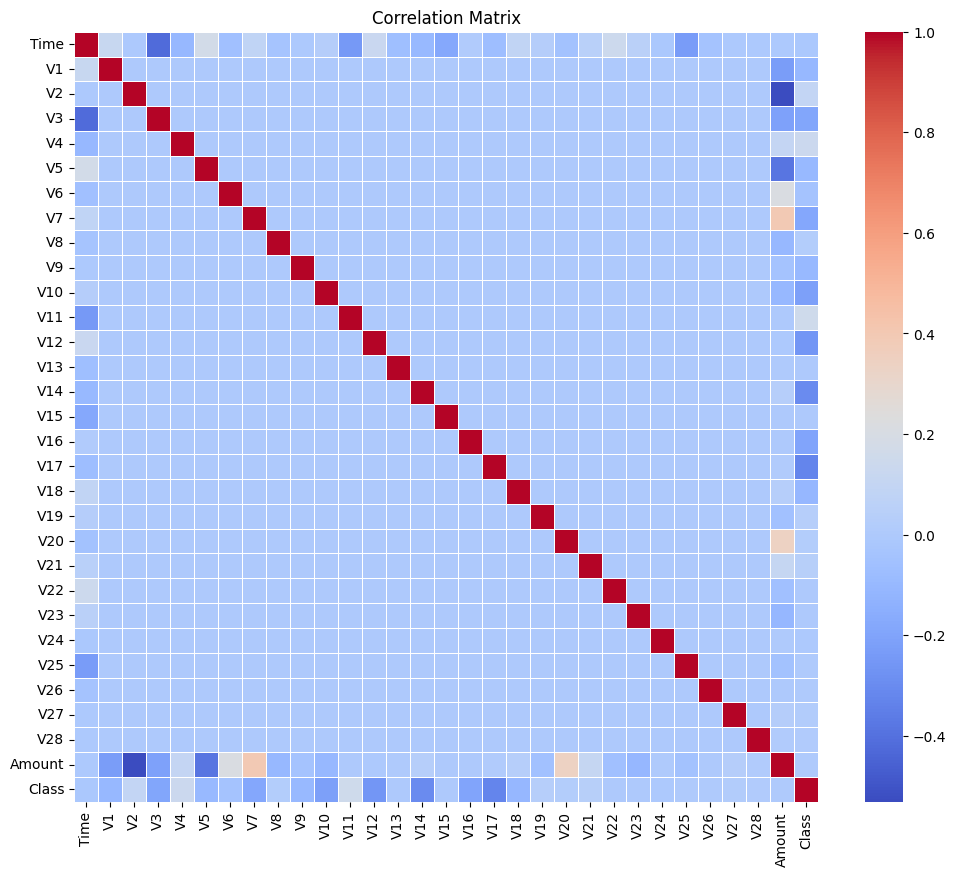

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [7]:
# Plot the correlation matrix
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
corr_matrix

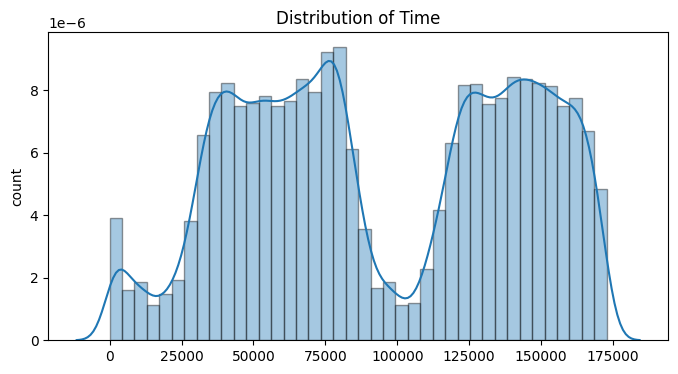

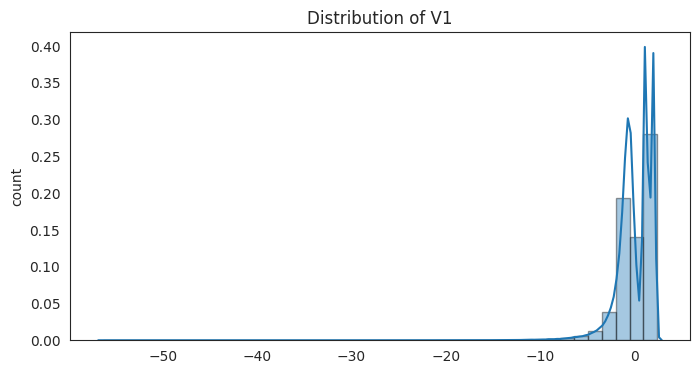

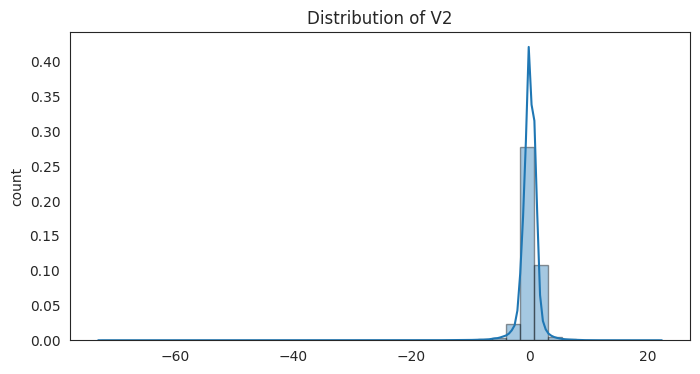

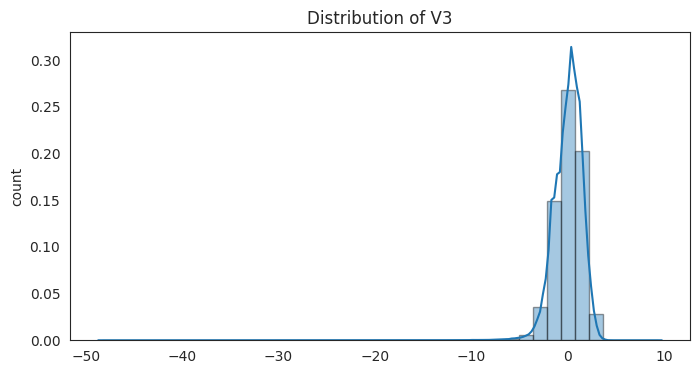

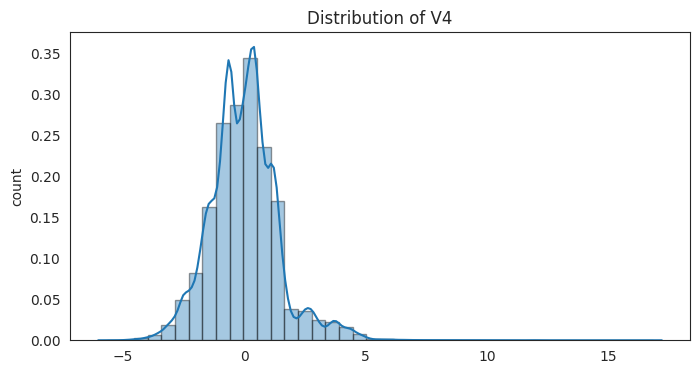

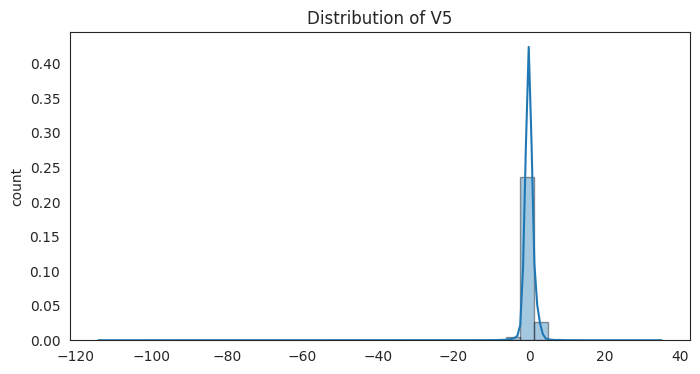

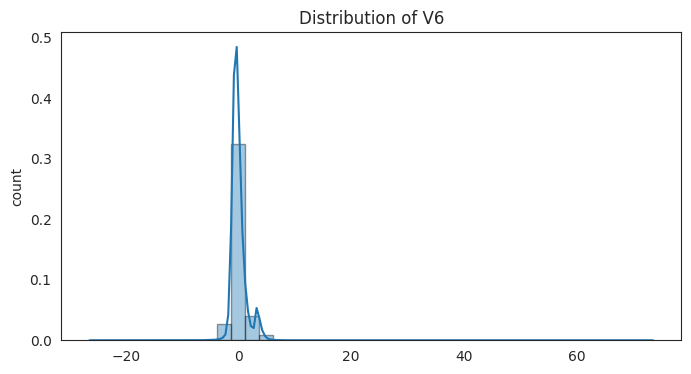

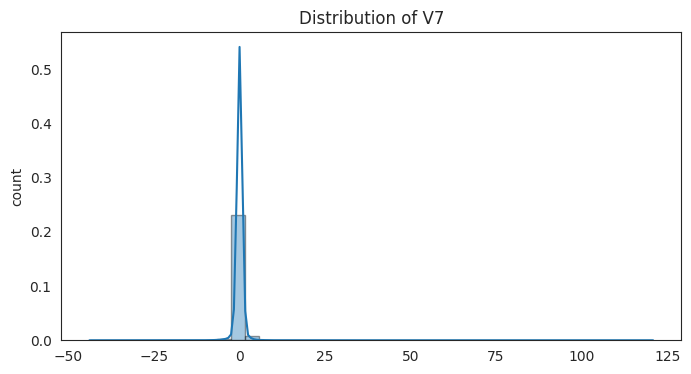

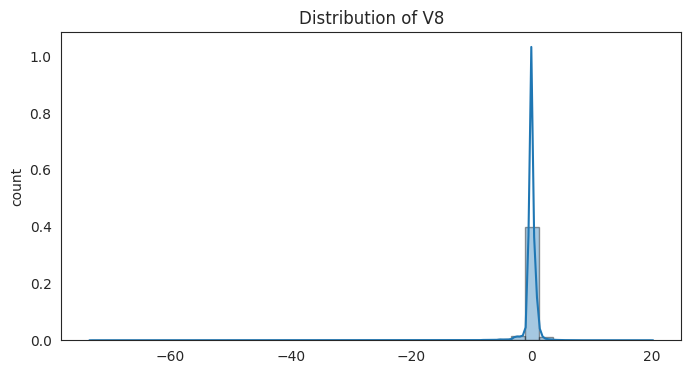

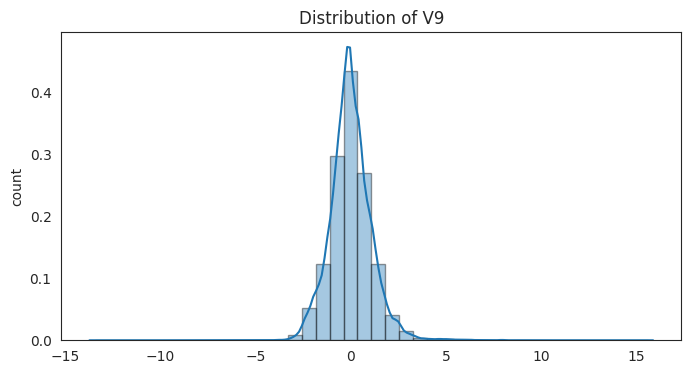

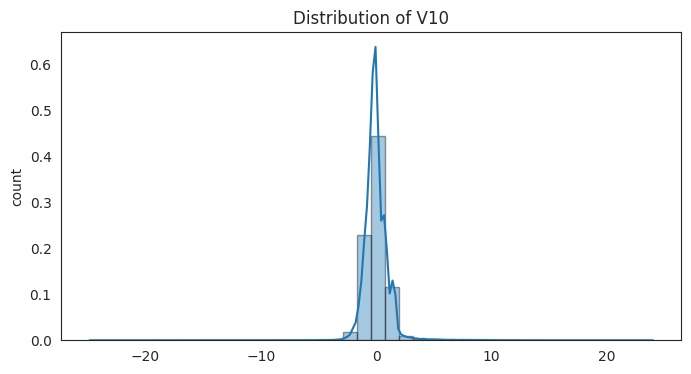

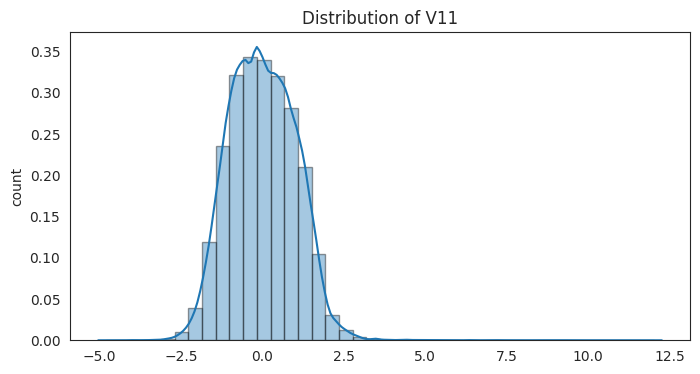

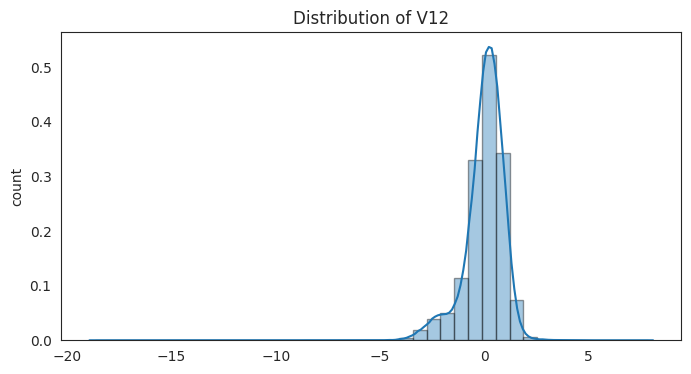

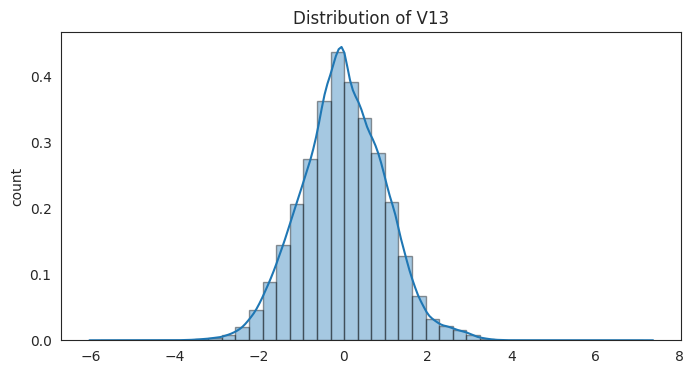

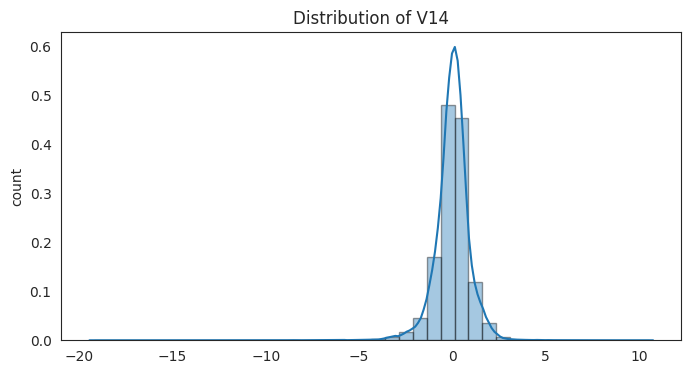

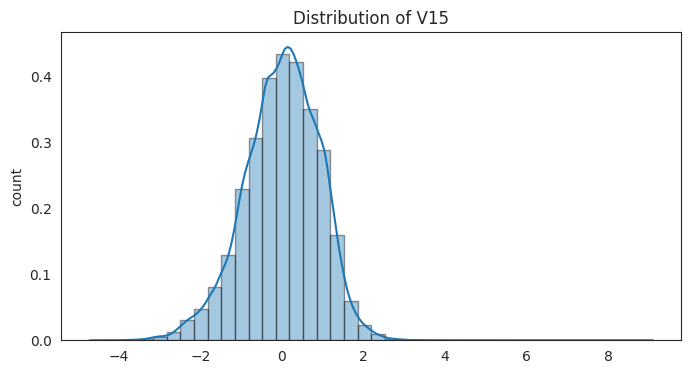

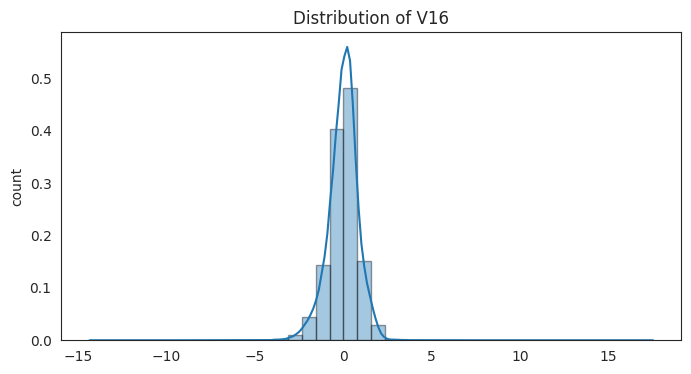

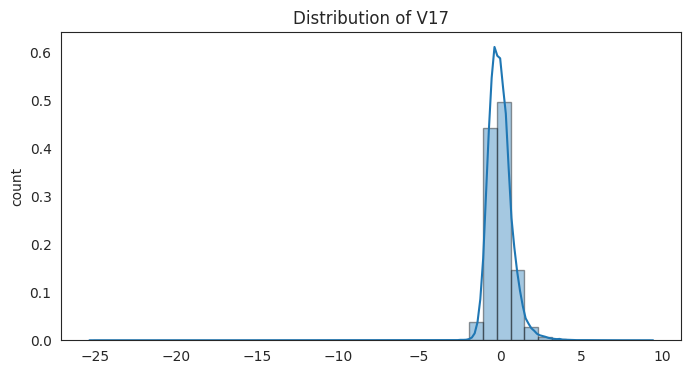

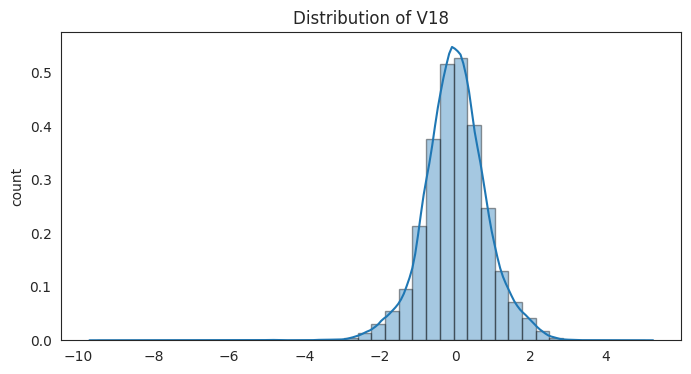

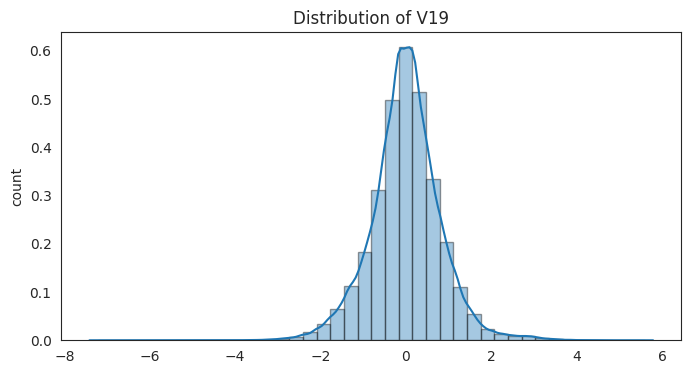

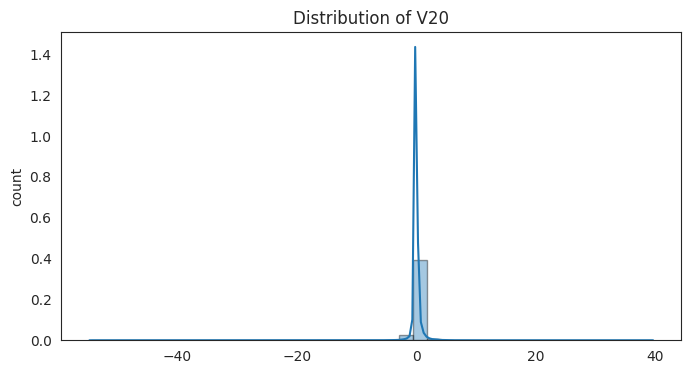

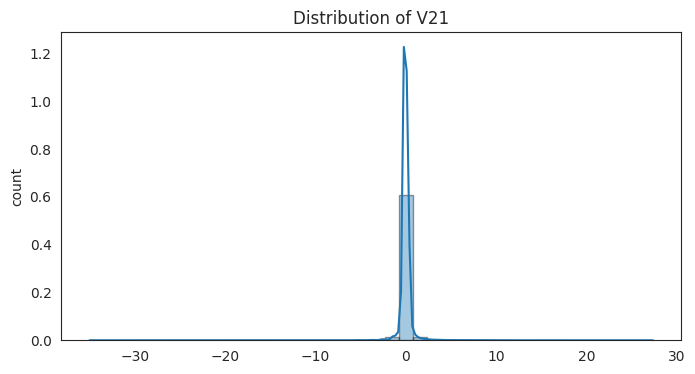

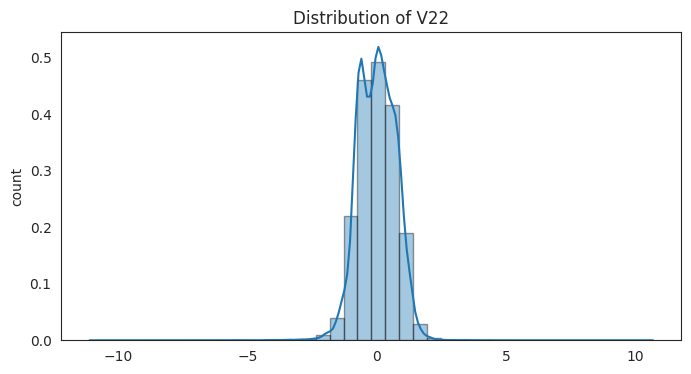

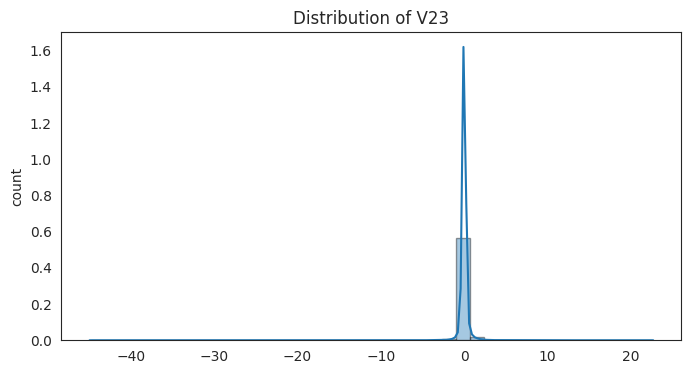

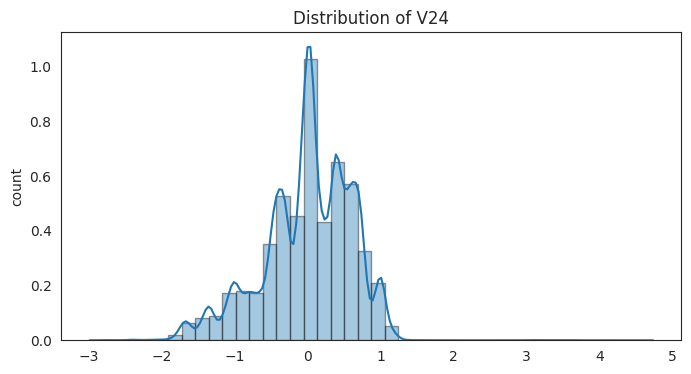

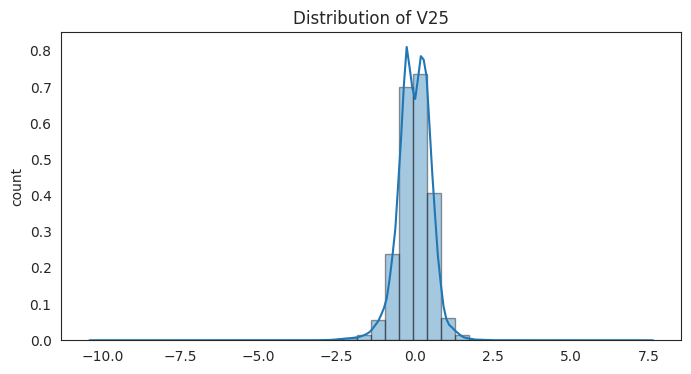

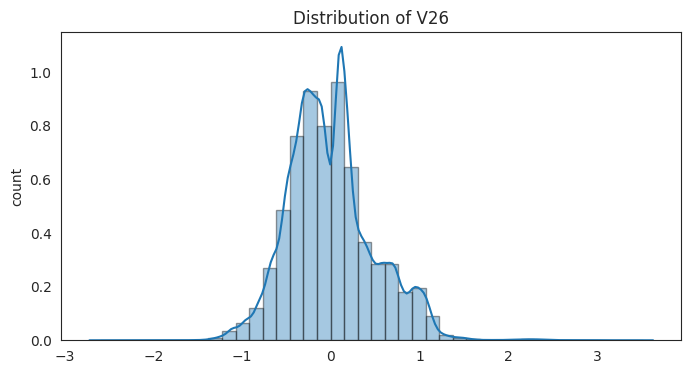

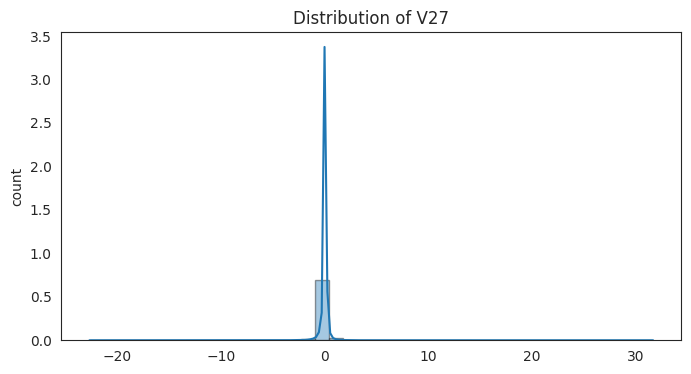

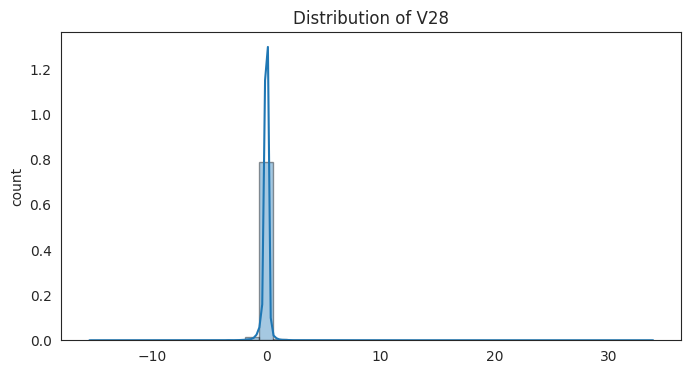

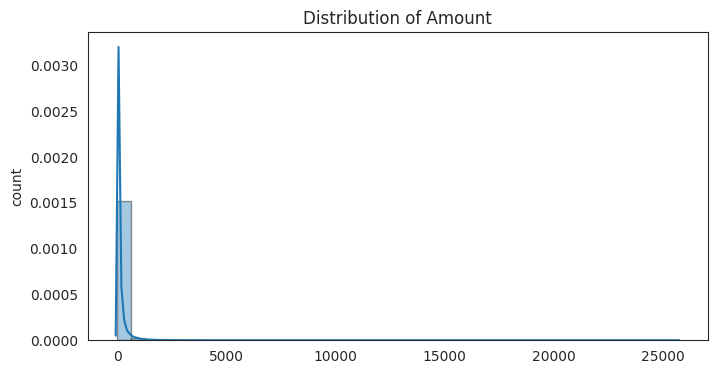

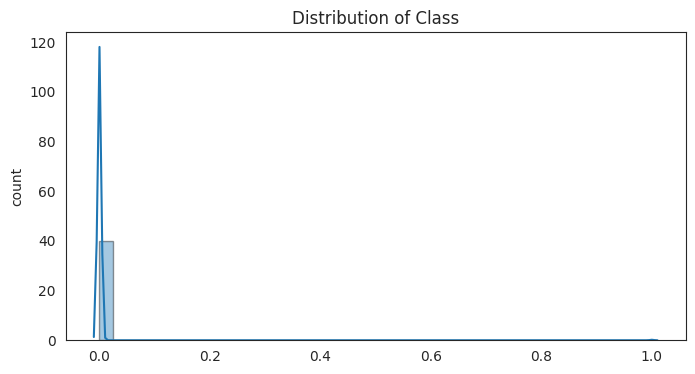

In [28]:
 # Plot the distribution of all columns
for col in df.columns:
    plt.figure(figsize=(8,4))
    plt.title(f'Distribution of {col}')
    sns.set_style("white")
    plt.ylabel('count')
    sns.distplot(x=df[col],kde=True, hist_kws=dict(edgecolor="black"),bins=40)
    plt.show()

In [29]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [10]:
# Display the class distribution in percentages
class_counts = df['Class'].value_counts(normalize=True) * 100
print(f"Class Distribution:\n{class_counts}")

Class Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


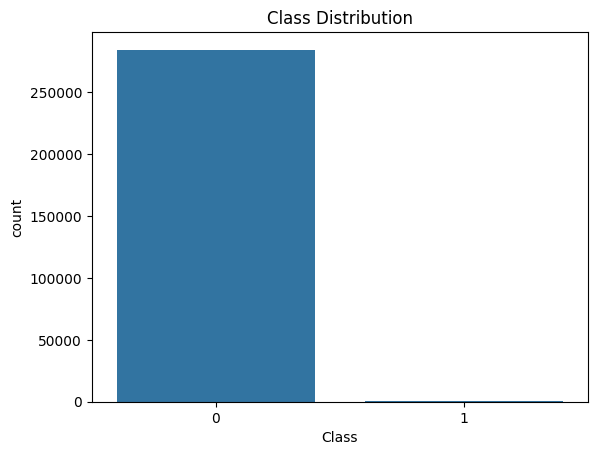

In [11]:
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

1. Two major challenges in the dataset based on your EDA findings:
> 1. Dataset is imbalance
> 2. Features are not in the same scale   
2. Analyze the correlation matrix of the features.
> The correlation matrix illustrates the correlation of each feature with the label and with each other. In this case, the label has the lowest correlation with feature v17. Additionally, normalizing the feature scale could potentially result in a different correlation matrix.


## Data Preprocessing

Based on the challenges we've identified, recommend preprocessing methods to use during training to enhance model performance are:


* Data Cleaning (Handling Missing Values, ...)
* Data Transformation (Standardization, ...)
* Feature Engineering (Feature Selection, ...)
* Handling Imbalanced Data
* ...

In [12]:
df.shape

(284807, 31)

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [15]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [16]:
# Standardize the features
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

def standardize_features(X_train, X_test):
    #scaler = RobustScaler()
    scaler = StandardScaler()
    #scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [17]:
# Balance the dataset
def dataset_balancement(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    fraud_indices = np.where(y_train == 1)[0]
    not_fraud_indices = np.where(y_train == 0)[0]
    fraud_records =  len(fraud_indices)

    under_sample_indices = np.random.choice(not_fraud_indices, len(not_fraud_indices), False)
    over_sample_indices = np.random.choice(fraud_indices, len(y_train), replace=True)

    y_train = y_train[np.concatenate([over_sample_indices, under_sample_indices])]
    X_train = X_train[np.concatenate([over_sample_indices, under_sample_indices])]
    print(X_train.shape, y_train.shape)
    return X_train, y_train

# **Forward sequential selection**

In [18]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
feature_names = np.array(list(df.columns[:-1]))
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=5, direction="forward"
).fit(X, y)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}")

Features selected by forward sequential selection: ['V10' 'V12' 'V14' 'V16' 'V17']


In [19]:
# Features selected by forward sequential selection: ['V10' 'V12' 'V14' 'V16' 'V17']

selected_features = ['V10', 'V12', 'V14', 'V16', 'V17']
new_df = df[selected_features]

new_df.head(5)

,V10,V12,V14,V16,V17
0,0.090794,-0.617801,-0.311169,-0.470401,0.207971
1,-0.166974,1.065235,-0.143772,0.463917,-0.114805
2,0.207643,0.066084,-0.165946,-2.890083,1.109969
3,-0.054952,0.178228,-0.287924,-1.059647,-0.684093
4,0.753074,0.538196,-1.119670,-0.451449,-0.237033


In [20]:
X_new = new_df
y_new = df['Class']
X_new.shape, y_new.shape

((284807, 5), (284807,))

## Classifying

1. Use KNN model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation the best model using K-Fold Cross Validation
3. Enhance Model's Performance

In [21]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.model_selection import StratifiedKFold, KFold , cross_val_score
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Accuracy Score",accuracy_score(y_test, pred))

Accuracy Score 0.9983029622087239


In [ ]:
print(cross_val_score(knn, X_train, y_train, cv=10))

[0.99834479 0.99834479 0.99839494 0.99834479 0.99844502 0.99849518
 0.99849518 0.99849518 0.9983447  0.99839486]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      0.02      0.04       148

    accuracy                           1.00     85443
   macro avg       1.00      0.51      0.52     85443
weighted avg       1.00      1.00      1.00     85443



# Finding the Optimum K

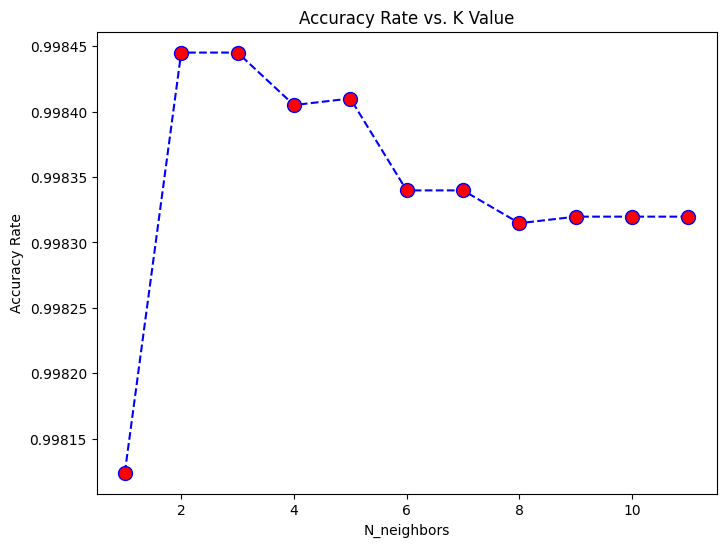

In [ ]:
accuracy_rate = []
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy_rate.append(scores.mean())

plt.figure(figsize=(8,6))
accuracy_plot = plt.plot(range(1,12), accuracy_rate, color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
accuracy_plot = plt.title('Accuracy Rate vs. K Value')
accuracy_plot = plt.xlabel('N_neighbors')
accuracy_plot = plt.ylabel('Accuracy Rate')

**Is accuracy a suitable metric for evaluating performance in this problem?**

No, Accuracy is generally not a good metric for evaluating model performance on highly imbalanced datasets. This is because accuracy measures the proportion of correct predictions out of all predictions, and in the case of imbalanced datasets, it can be misleading. If the majority class is much larger than the minority class, a model could achieve high accuracy simply by always predicting the majority class, but it would fail to capture the performance on the minority class.

Achieving high recall is crucial for this problem, Balance the dataset classes is the best way to handle such problems.

K = 3  &  Accuracy Score 0.9983614807532507


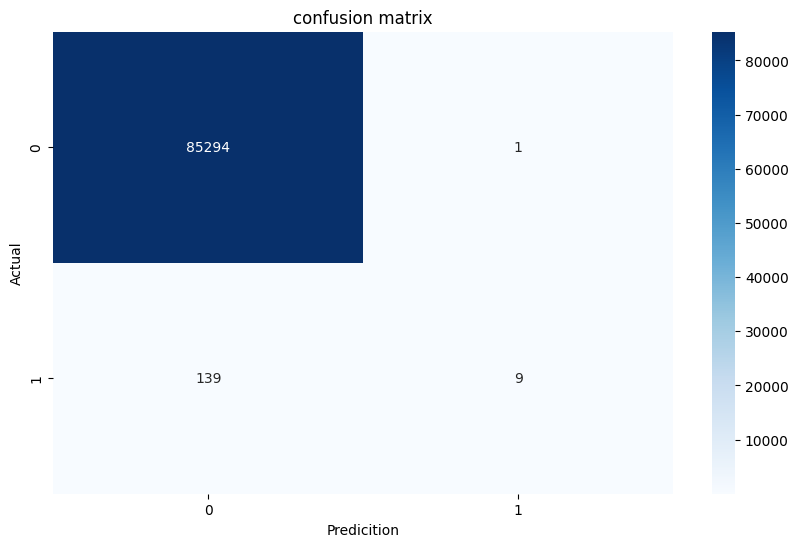

0.5303995433970814


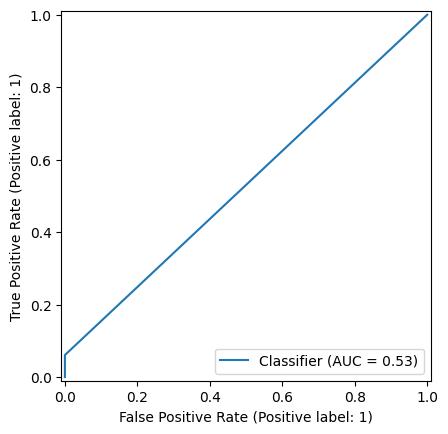

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("K = 3  &  Accuracy Score",accuracy_score(y_test, pred))
cm = confusion_matrix(y_test,pred)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, pred))
RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

In [ ]:
X_train_s, X_test_s = standardize_features(X_train, X_test)
X_train_s_b, y_train_b = dataset_balancement(X_train_s, y_train)

(398384, 30) (398384,)


K = 3  &  Accuracy Score 0.999204147794436


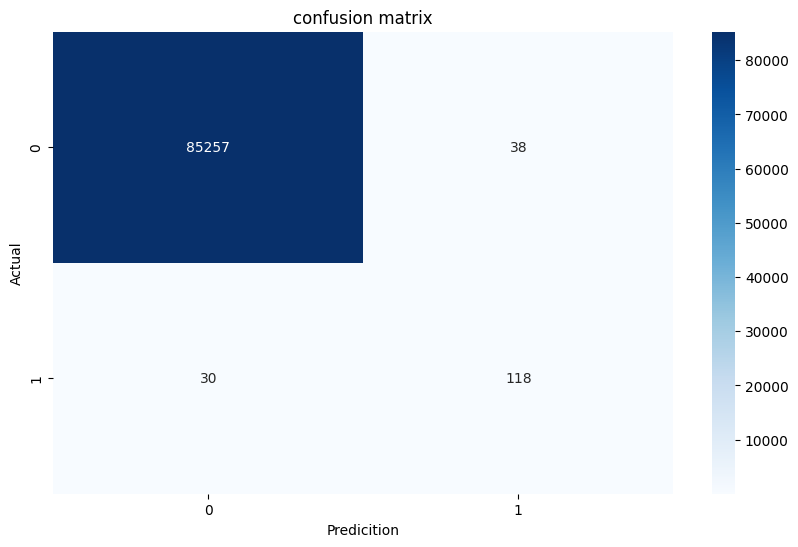

0.8984258923323347


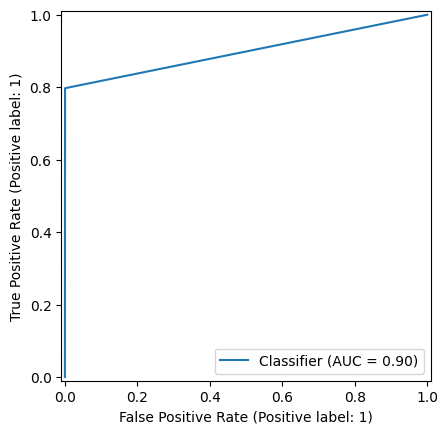

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.80      0.78       148

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_s_b, y_train_b)
pred_s_b = knn.predict(X_test_s)
print("K = 3  &  Accuracy Score",accuracy_score(y_test, pred_s_b))
cm = confusion_matrix(y_test,pred_s_b)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, pred_s_b))
RocCurveDisplay.from_predictions(y_test, pred_s_b)
plt.show()
print("Classification Report:")
print(classification_report(y_test, pred_s_b))

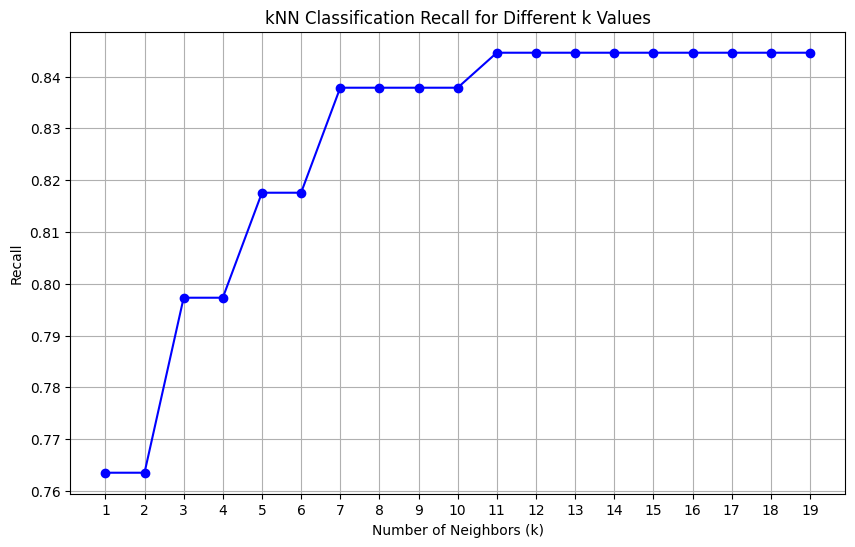

In [ ]:
k_values = range(1, 20)
recall_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_s_b, y_train_b)
    y_preds = knn.predict(X_test_s)
    recall = recall_score(y_test, y_preds)
    recall_scores.append(recall)

# Plotting Recall for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, recall_scores, marker='o', linestyle='-', color='b')
plt.title('kNN Classification Recall for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall')
plt.xticks(k_values)
plt.grid(True)
plt.show()

K = 7  &  Accuracy Score 0.9988062216916541


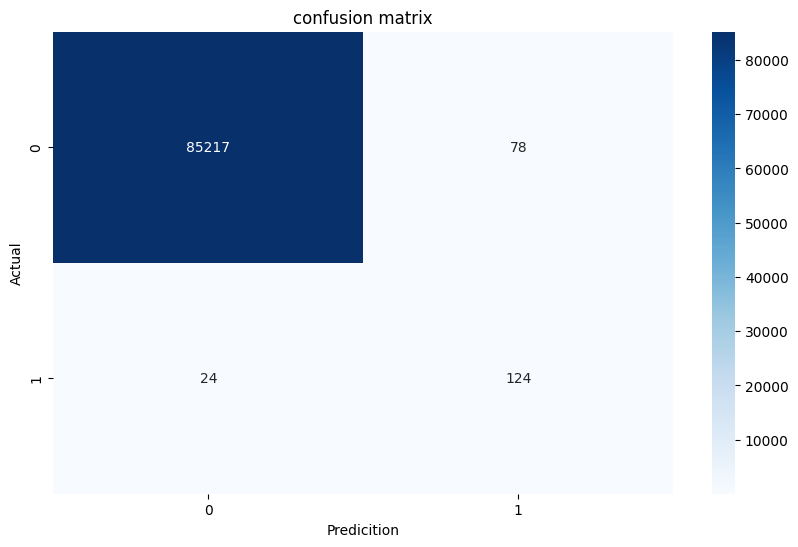

0.9184616822696429


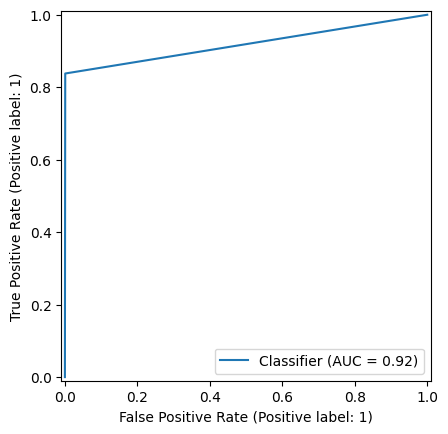

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.61      0.84      0.71       148

    accuracy                           1.00     85443
   macro avg       0.81      0.92      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_s_b, y_train_b)
pred_s_b = knn.predict(X_test_s)
print("K = 7  &  Accuracy Score",accuracy_score(y_test, pred_s_b))
cm = confusion_matrix(y_test,pred_s_b)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, pred_s_b))
RocCurveDisplay.from_predictions(y_test, pred_s_b)
plt.show()
print("Classification Report:")
print(classification_report(y_test, pred_s_b))

K = 11  &  Accuracy Score 0.9984199992977775


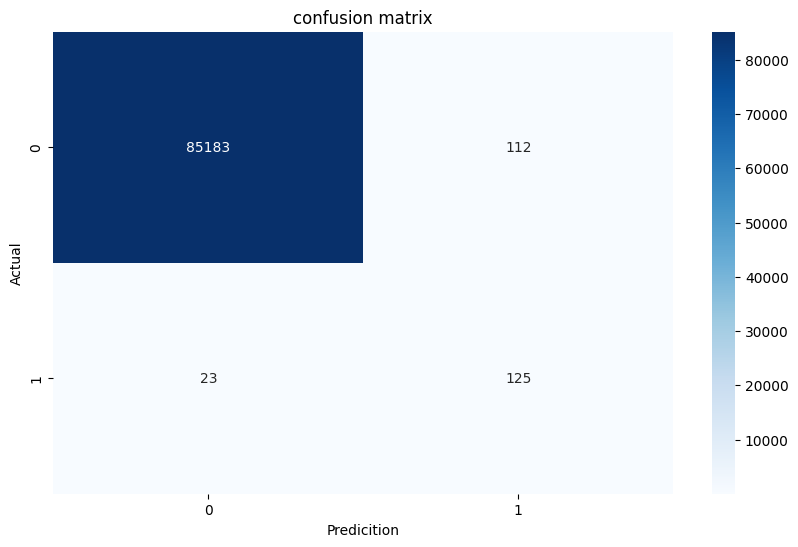

0.9216407523650035


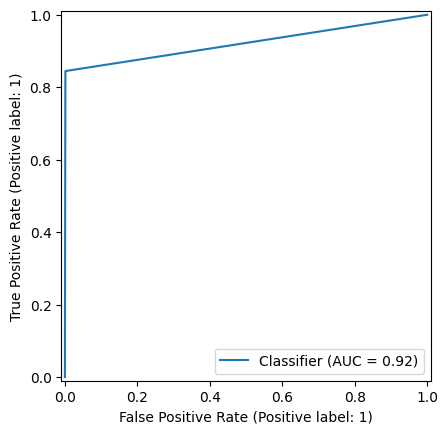

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.53      0.84      0.65       148

    accuracy                           1.00     85443
   macro avg       0.76      0.92      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_s_b, y_train_b)
pred_s_b = knn.predict(X_test_s)
print("K = 11  &  Accuracy Score",accuracy_score(y_test, pred_s_b))
cm = confusion_matrix(y_test,pred_s_b)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, pred_s_b))
RocCurveDisplay.from_predictions(y_test, pred_s_b)
plt.show()
print("Classification Report:")
print(classification_report(y_test, pred_s_b))

In [ ]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42, stratify=y)

K = 3  &  Accuracy Score 0.9995201479348805


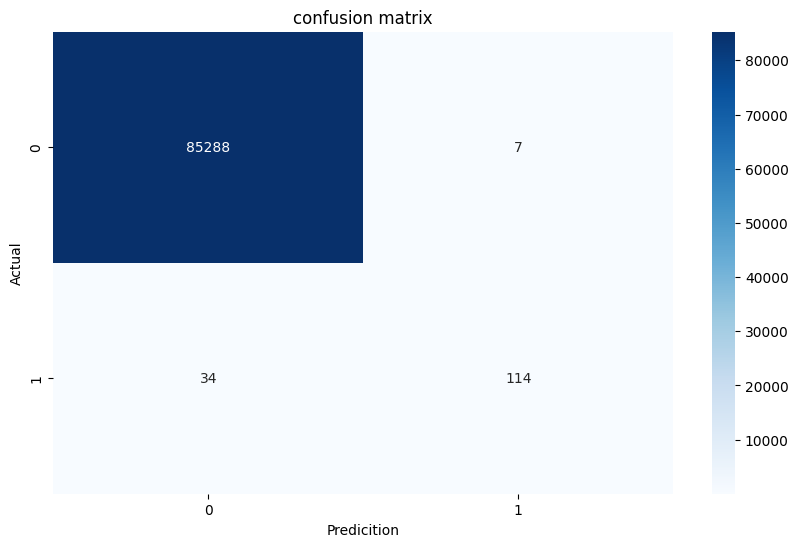

0.8850941010768666


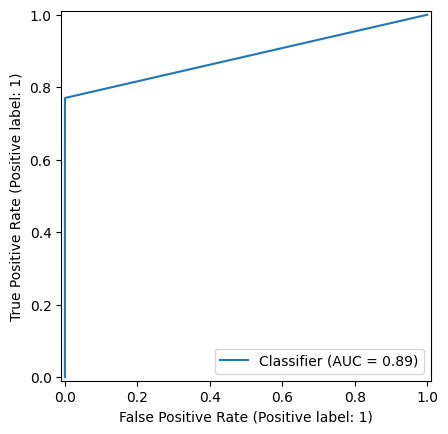

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.77      0.85       148

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_new_train, y_new_train)
pred_new = knn.predict(X_new_test)
print("K = 3  &  Accuracy Score",accuracy_score(y_new_test, pred_new))
cm = confusion_matrix(y_new_test,pred_new)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_new_test, pred_new))
RocCurveDisplay.from_predictions(y_new_test, pred_new)
plt.show()
print("Classification Report:")
print(classification_report(y_new_test, pred_new))

In [ ]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [ ]:
X_new_train_s, X_new_test_s = standardize_features(X_new_train, X_new_test)
X_new_train_s_b, y_new_train_b = dataset_balancement(X_new_train_s, y_new_train)

(398372, 5) (398372,)


K = 3  &  Accuracy Score 0.9989466661985184


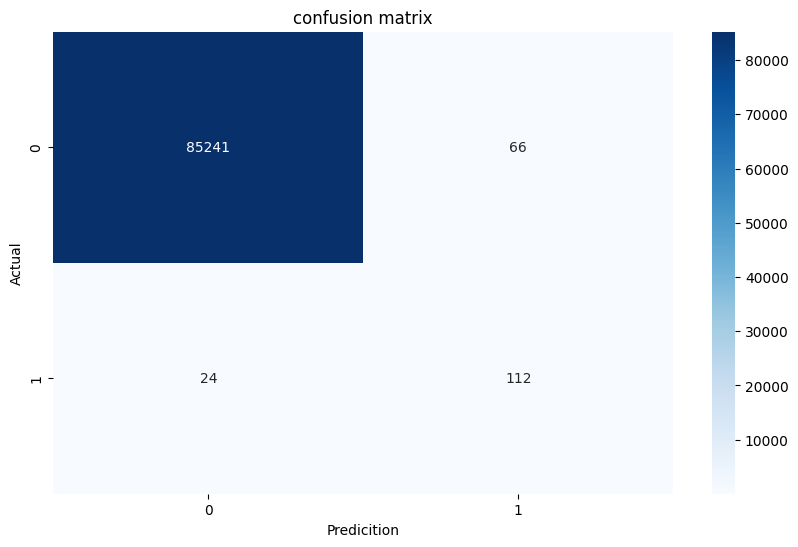

0.911377867756525


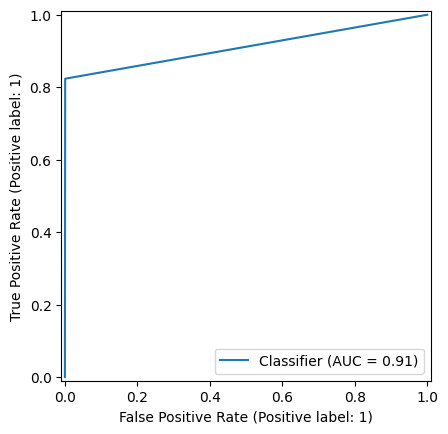

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.63      0.82      0.71       136

    accuracy                           1.00     85443
   macro avg       0.81      0.91      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_new_train_s_b, y_new_train_b)
pred_new_s_b = knn.predict(X_new_test_s)
print("K = 3  &  Accuracy Score",accuracy_score(y_new_test, pred_new_s_b))
cm = confusion_matrix(y_new_test,pred_new_s_b)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_new_test, pred_new_s_b))
RocCurveDisplay.from_predictions(y_new_test, pred_new_s_b)
plt.show()
print("Classification Report:")
print(classification_report(y_new_test, pred_new_s_b))

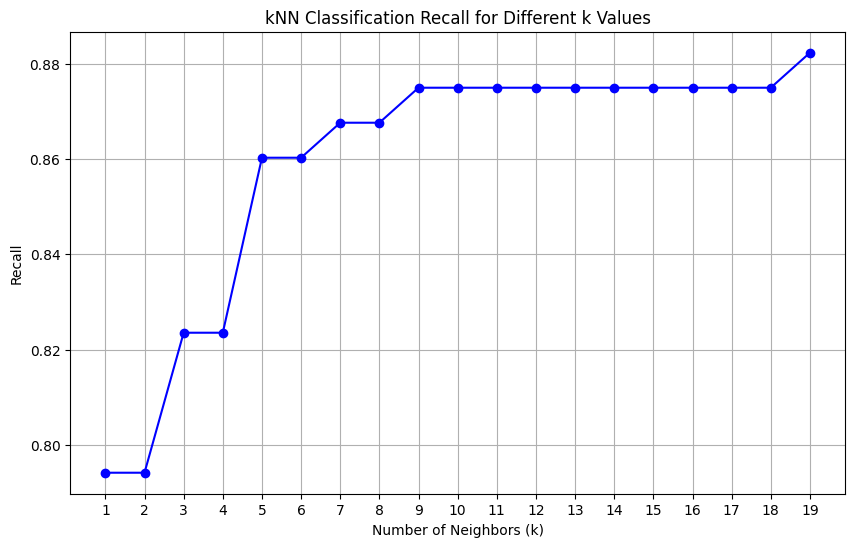

In [ ]:
k_values = range(1, 20)
recall_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_new_train_s_b, y_new_train_b)
    y_pred = knn.predict(X_new_test_s)
    recall = recall_score(y_new_test, y_pred)
    recall_scores.append(recall)

# Plotting Recall for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, recall_scores, marker='o', linestyle='-', color='b')
plt.title('kNN Classification Recall for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall')
plt.xticks(k_values)
plt.grid(True)
plt.show()

K = 9  &  Accuracy Score 0.9982678510820079


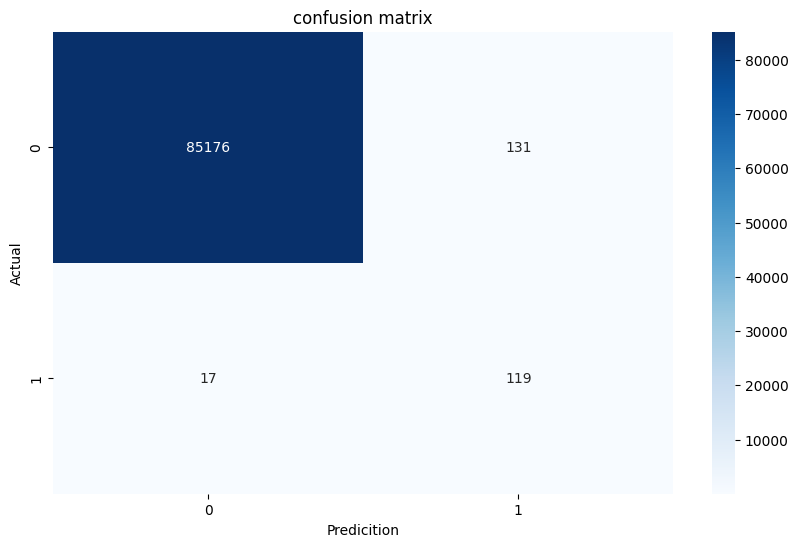

0.9367321849320689


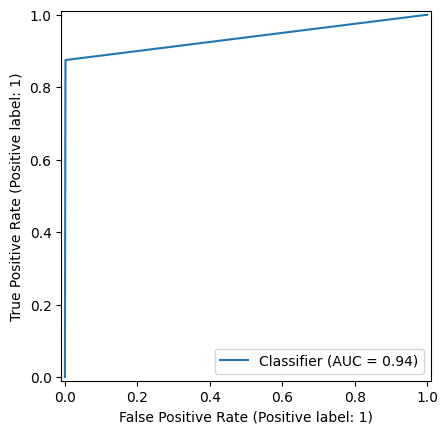

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.48      0.88      0.62       136

    accuracy                           1.00     85443
   macro avg       0.74      0.94      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_new_train_s_b, y_new_train_b)
pred_new_s_b = knn.predict(X_new_test_s)
print("K = 9  &  Accuracy Score",accuracy_score(y_new_test, pred_new_s_b))
cm = confusion_matrix(y_new_test,pred_new_s_b)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_new_test, pred_new_s_b))
RocCurveDisplay.from_predictions(y_new_test, pred_new_s_b)
plt.show()
print("Classification Report:")
print(classification_report(y_new_test, pred_new_s_b))

# **Classification with Decision Trees**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

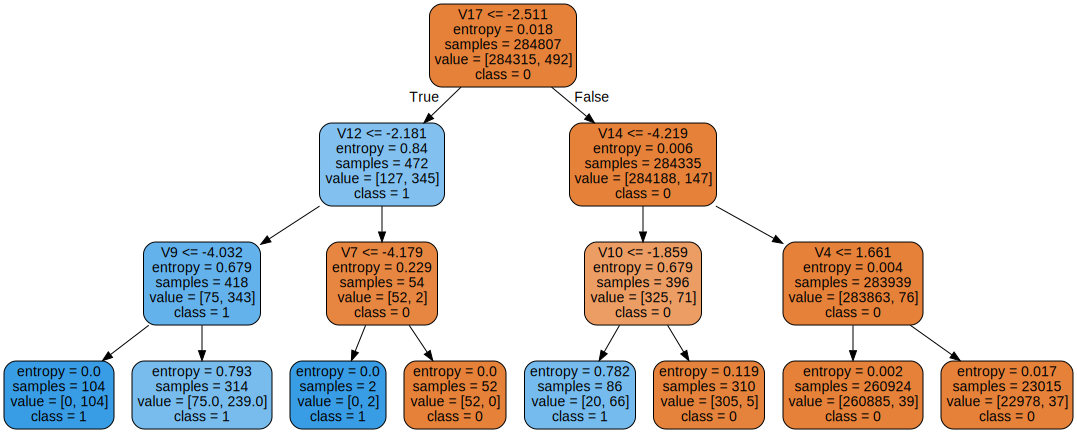

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y)


dot_data = export_graphviz(
    clf,
    feature_names= X_train.columns,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    proportion=False
)

graph = graphviz.Source(dot_data)
graph.render(filename="decision_tree", format="png", cleanup=True)
graph.view()
graph

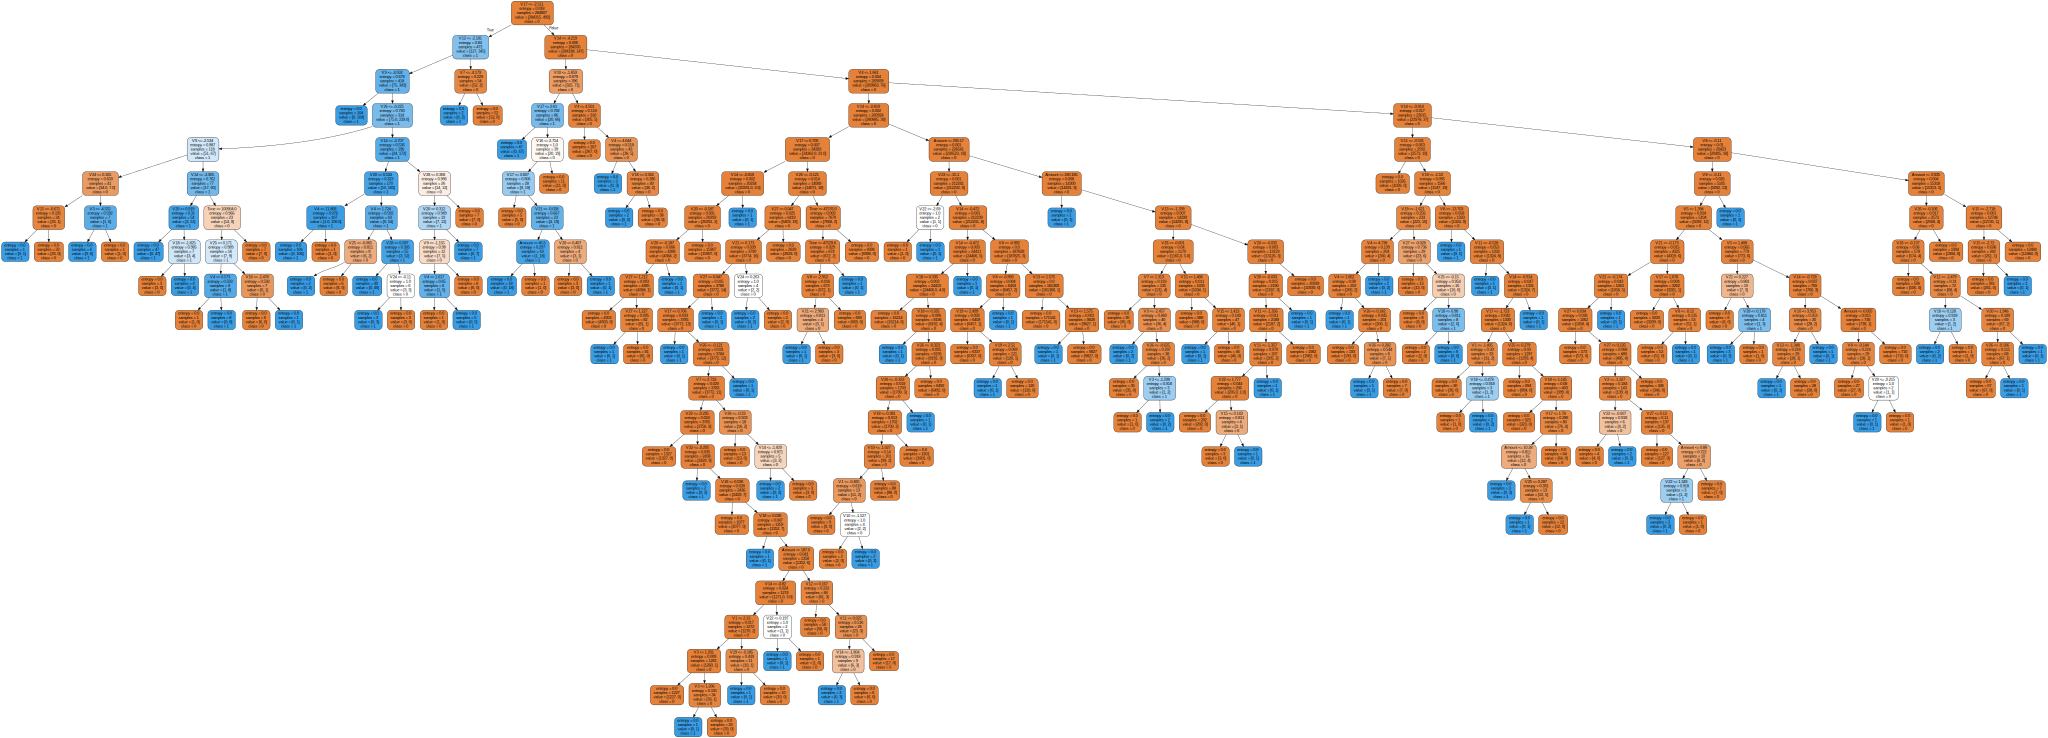

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

dot_data = export_graphviz(
    clf,
    feature_names= X_train.columns,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    proportion=False
)

graph = graphviz.Source(dot_data)
graph.render(filename="decision_tree", format="png", cleanup=True)
graph.view()
graph

In [ ]:
clf_id3 = DecisionTreeClassifier(criterion='entropy')
clf_id3.fit(X_train, y_train)
y_pred_id3 = clf_id3.predict(X_test)

Classifire = id3  &  Accuracy Score 0.99916903666772


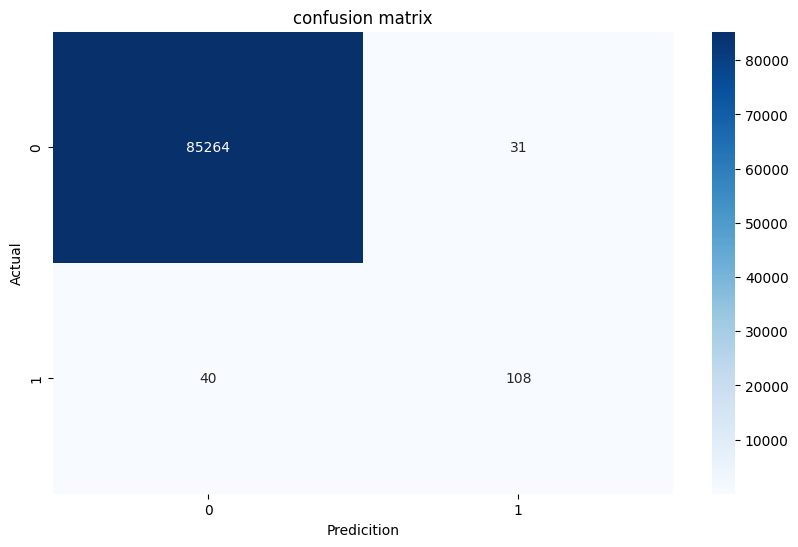

0.8646831426068194


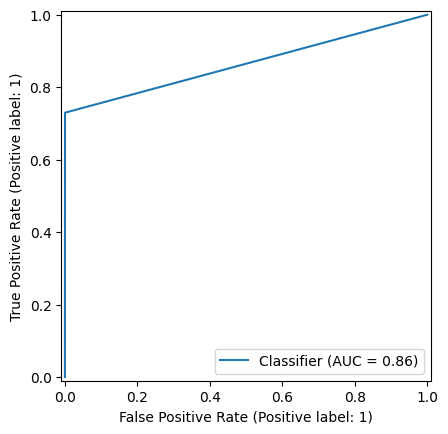

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.73      0.75       148

    accuracy                           1.00     85443
   macro avg       0.89      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print("Classifire = id3  &  Accuracy Score",accuracy_score(y_test, y_pred_id3))
cm = confusion_matrix(y_test, y_pred_id3)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_id3))
RocCurveDisplay.from_predictions(y_test, y_pred_id3)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_id3))

In [ ]:
clf_c45 = DecisionTreeClassifier(criterion='gini')
clf_c45.fit(X_train, y_train)
y_pred_c45 = clf_c45.predict(X_test)

Classifire = c4.5  &  Accuracy Score 0.9991807403766253


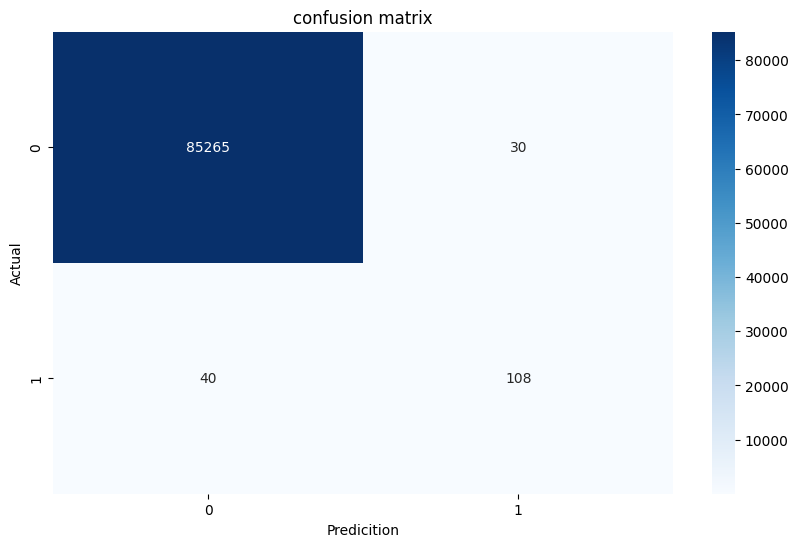

0.8646890046151433


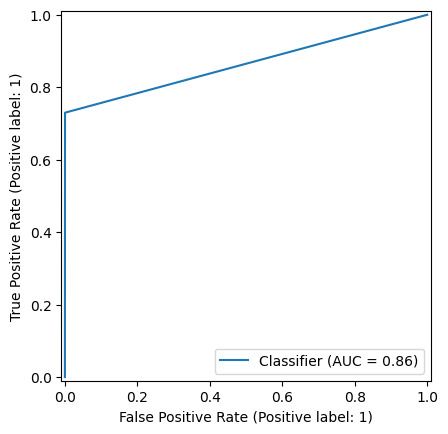

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.73      0.76       148

    accuracy                           1.00     85443
   macro avg       0.89      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print("Classifire = c4.5  &  Accuracy Score",accuracy_score(y_test, y_pred_c45))
cm = confusion_matrix(y_test, y_pred_c45)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_c45))
RocCurveDisplay.from_predictions(y_test, y_pred_c45)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_c45))

# **Classifying with processed data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train_s, X_test_s = standardize_features(X_train, X_test)
X_train_s_b, y_train_b = dataset_balancement(X_train_s, y_train)

(398372, 30) (398372,)


Classifire = id3  &  Accuracy Score 0.9991924440855307


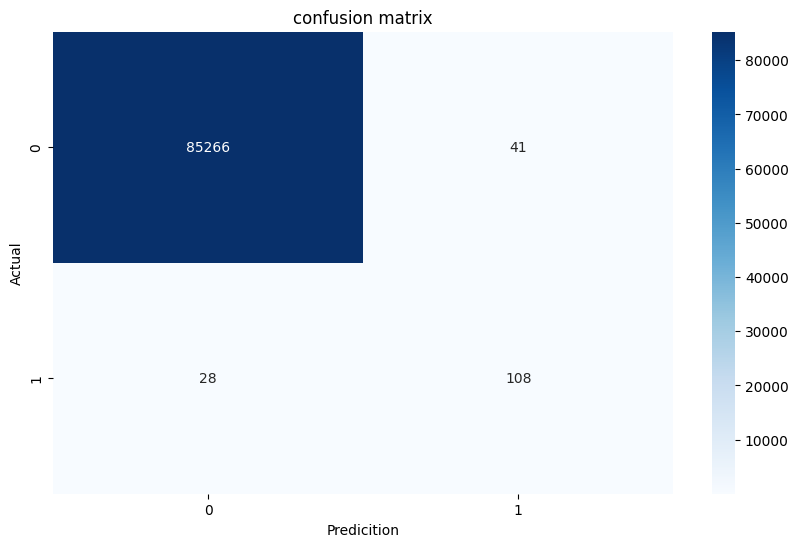

0.8968185149967004


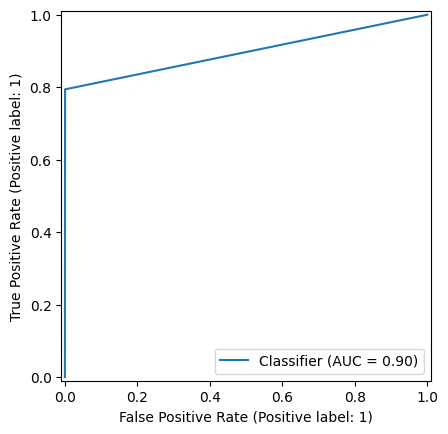

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.72      0.79      0.76       136

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
clf_id3 = DecisionTreeClassifier(criterion='entropy')
clf_id3.fit(X_train_s_b, y_train_b)
y_pred_s_b = clf_id3.predict(X_test_s)

print("Classifire = id3  &  Accuracy Score",accuracy_score(y_test, y_pred_s_b))
cm = confusion_matrix(y_test, y_pred_s_b)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_s_b))
RocCurveDisplay.from_predictions(y_test, y_pred_s_b)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_s_b))

Classifire = c4.5  &  Accuracy Score 0.9990637032875719


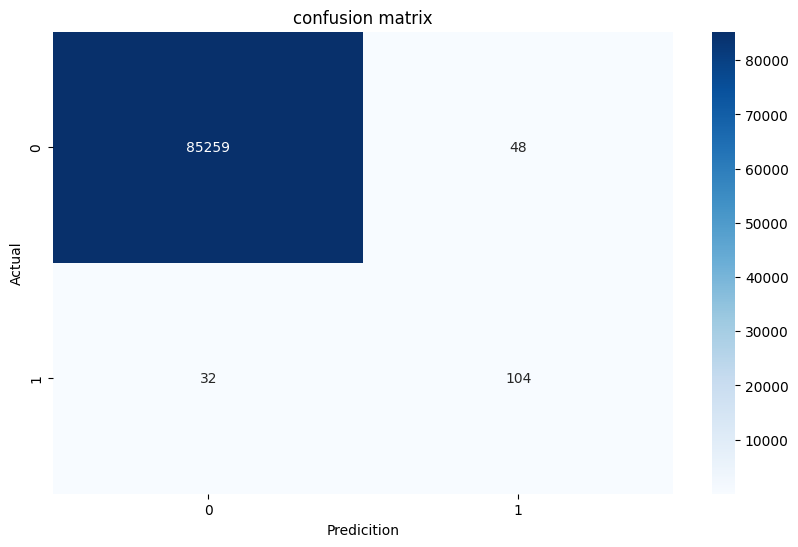

0.8820716043576867


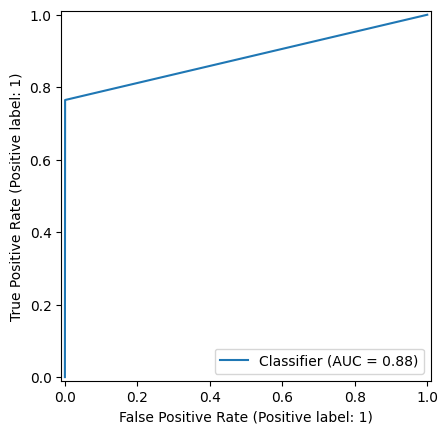

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.68      0.76      0.72       136

    accuracy                           1.00     85443
   macro avg       0.84      0.88      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
clf_c45 = DecisionTreeClassifier(criterion='gini')
clf_c45.fit(X_train_s_b, y_train_b)
y_pred_s_b_c45 = clf_c45.predict(X_test_s)

print("Classifire = c4.5  &  Accuracy Score",accuracy_score(y_test, y_pred_s_b_c45))
cm = confusion_matrix(y_test, y_pred_s_b_c45)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_s_b_c45))
RocCurveDisplay.from_predictions(y_test, y_pred_s_b_c45)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_s_b_c45))

# **Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Classifire = RandomForest  &  Accuracy Score 0.9995201479348805


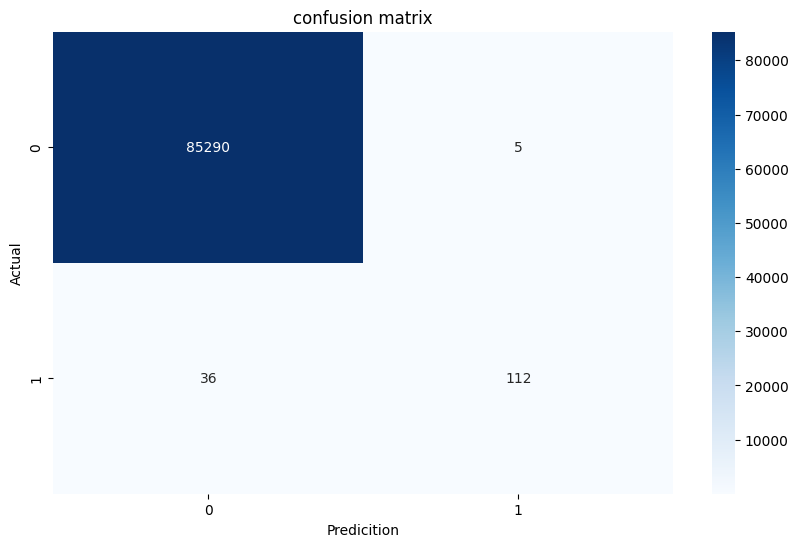

0.8783490683367581


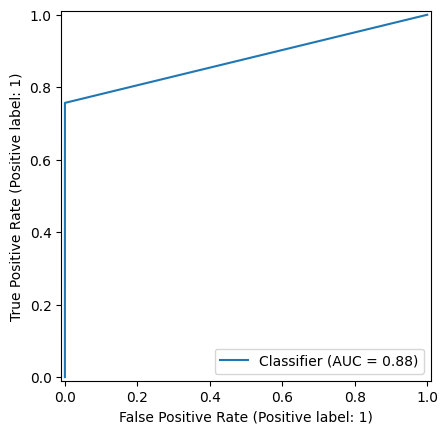

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

print("Classifire = RandomForest  &  Accuracy Score",accuracy_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_rf))
RocCurveDisplay.from_predictions(y_test, y_pred_rf)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_s, X_test_s = standardize_features(X_train, X_test)
X_train_s_b, y_train_b = dataset_balancement(X_train_s, y_train)

(398372, 30) (398372,)


Classifire = RandomForest  &  Accuracy Score 0.9996371850239341


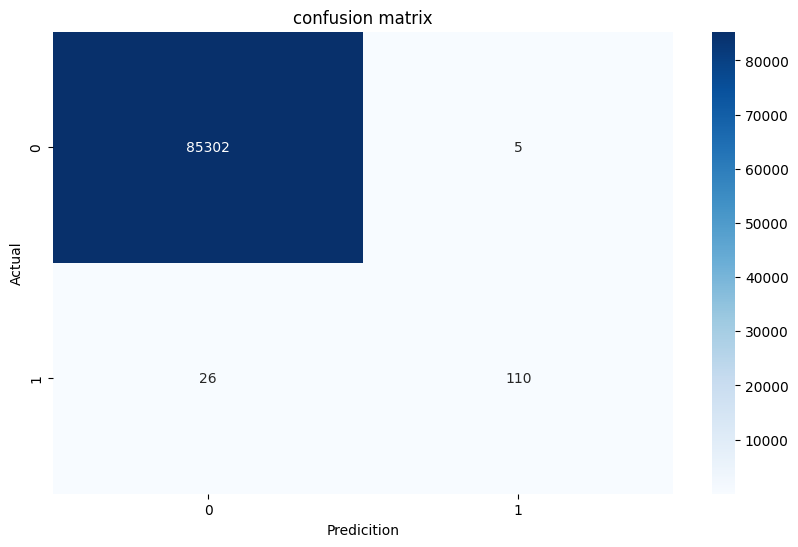

0.904382458787259


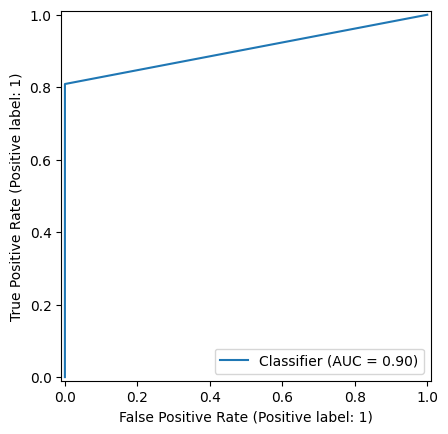

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.81      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_s_b, y_train_b)
y_pred_s_b_rf = rf_classifier.predict(X_test_s)

print("Classifire = RandomForest  &  Accuracy Score",accuracy_score(y_test, y_pred_s_b_rf))
cm = confusion_matrix(y_test, y_pred_s_b_rf)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_s_b_rf))
RocCurveDisplay.from_predictions(y_test, y_pred_s_b_rf)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_s_b_rf))

# **Classifying with different Depth**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
clf_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_id3.fit(X_train, y_train)
y_pred_id3 = clf_id3.predict(X_test)

Classifire = id3  &  Accuracy Score 0.9992392589211521


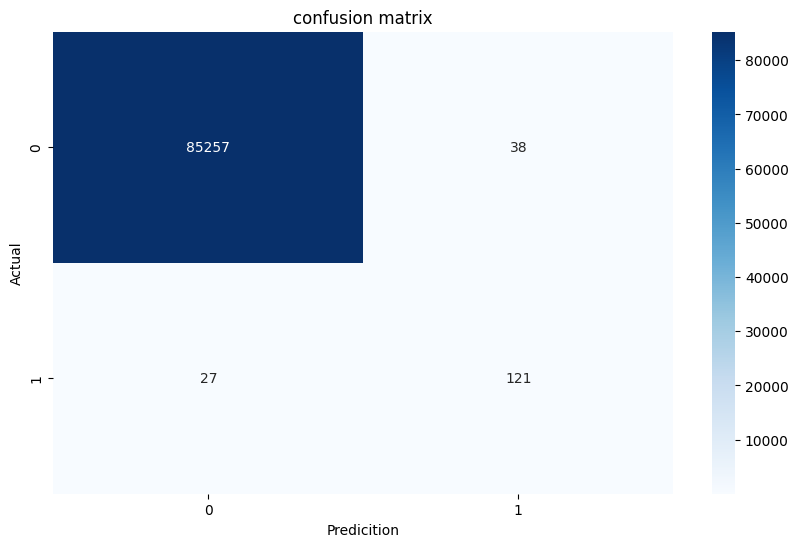

0.9085610274674698


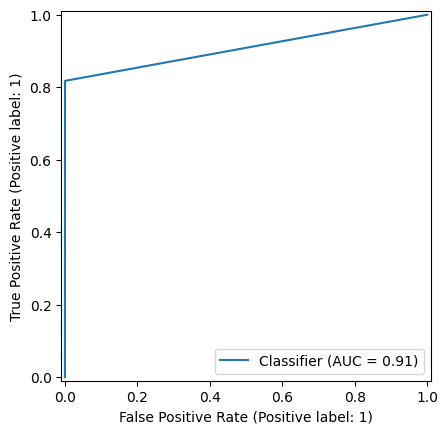

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.82      0.79       148

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print("Classifire = id3  &  Accuracy Score",accuracy_score(y_test, y_pred_id3))
cm = confusion_matrix(y_test, y_pred_id3)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_id3))
RocCurveDisplay.from_predictions(y_test, y_pred_id3)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_id3))

In [ ]:
clf_c45 = DecisionTreeClassifier(criterion='gini', max_depth=7)
clf_c45.fit(X_train, y_train)
y_pred_c45 = clf_c45.predict(X_test)

Classifire = c4.5  &  Accuracy Score 0.9994733330992591


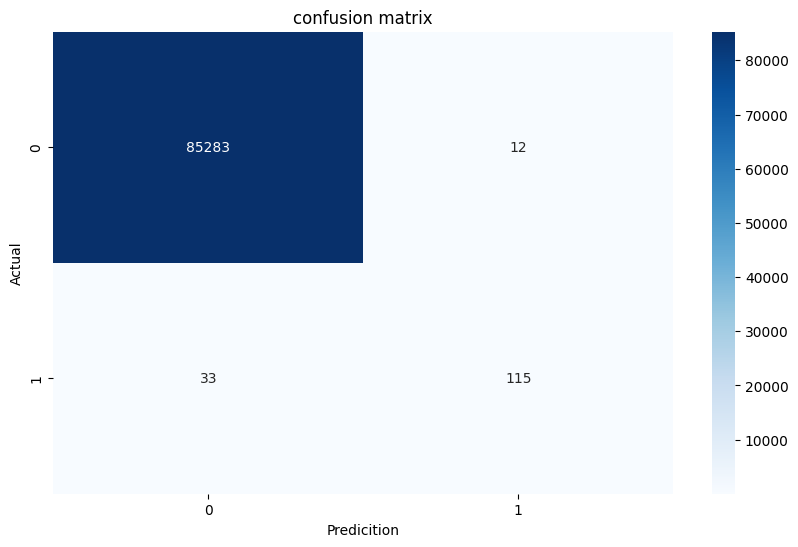

0.8884431694136249


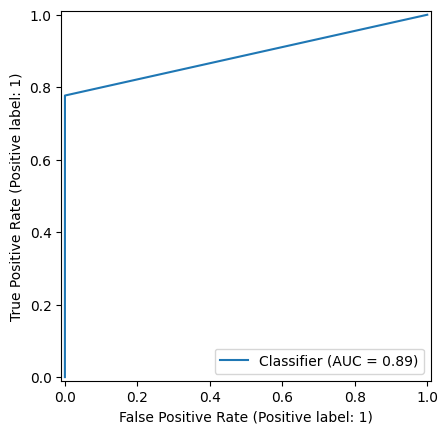

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.78      0.84       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print("Classifire = c4.5  &  Accuracy Score",accuracy_score(y_test, y_pred_c45))
cm = confusion_matrix(y_test, y_pred_c45)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_c45))
RocCurveDisplay.from_predictions(y_test, y_pred_c45)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_c45))

# **Classifying with processed data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train_s, X_test_s = standardize_features(X_train, X_test)
X_train_s_b, y_train_b = dataset_balancement(X_train_s, y_train)

(398372, 30) (398372,)


Classifire = id3  &  Accuracy Score 0.9481525695492902


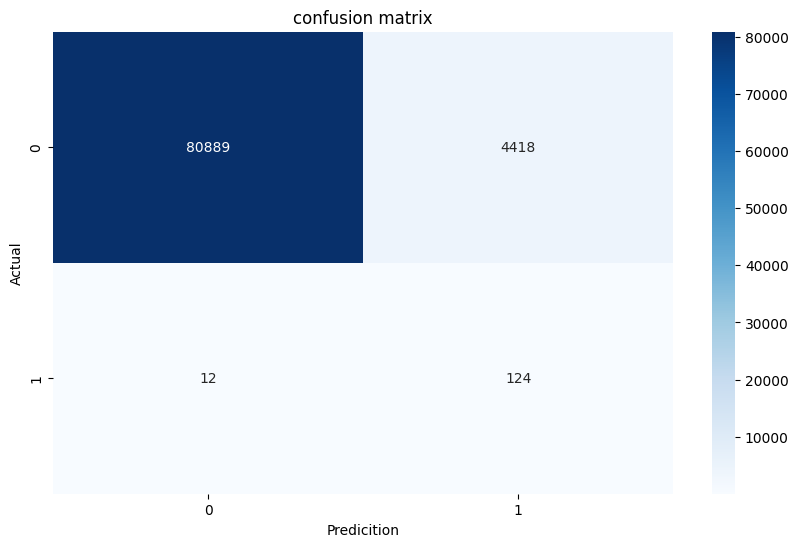

0.9299876432456062


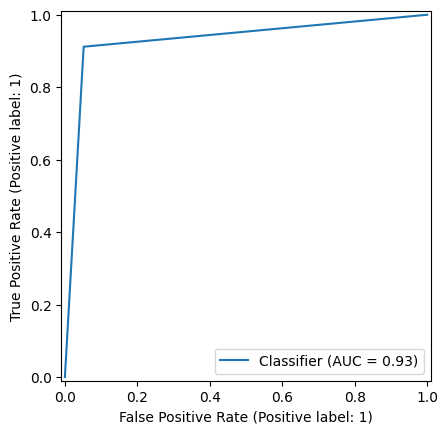

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85307
           1       0.03      0.91      0.05       136

    accuracy                           0.95     85443
   macro avg       0.51      0.93      0.51     85443
weighted avg       1.00      0.95      0.97     85443



In [ ]:
clf_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_id3.fit(X_train_s_b, y_train_b)
y_pred_s_b = clf_id3.predict(X_test_s)

print("Classifire = id3  &  Accuracy Score",accuracy_score(y_test, y_pred_s_b))
cm = confusion_matrix(y_test, y_pred_s_b)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_s_b))
RocCurveDisplay.from_predictions(y_test, y_pred_s_b)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_s_b))

Classifire = c4.5  &  Accuracy Score 0.9875940685603267


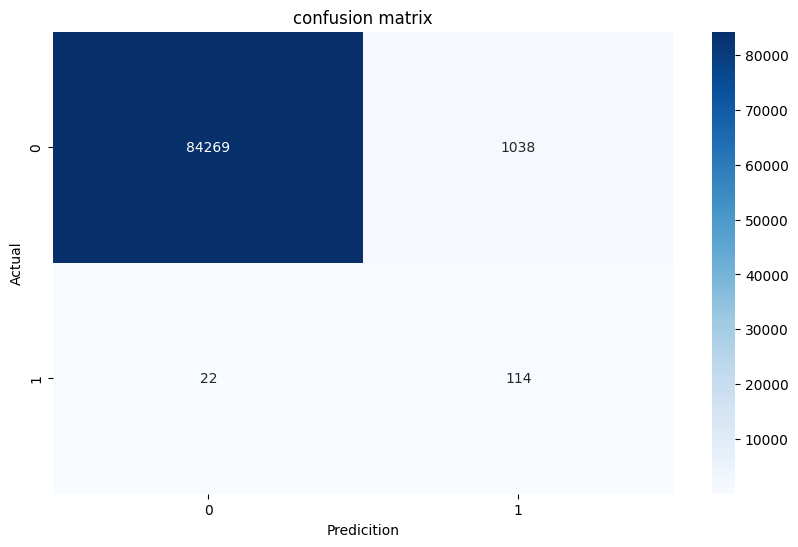

0.9130337383526214


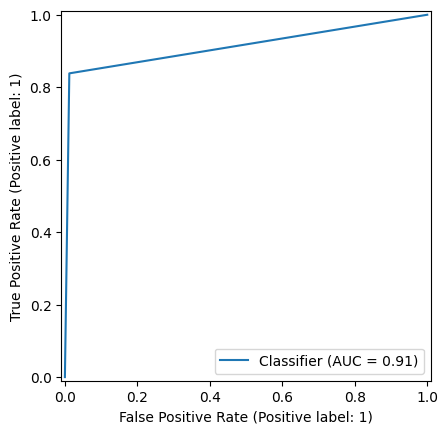

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.10      0.84      0.18       136

    accuracy                           0.99     85443
   macro avg       0.55      0.91      0.59     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
clf_c45 = DecisionTreeClassifier(criterion='gini', max_depth=7)
clf_c45.fit(X_train_s_b, y_train_b)
y_pred_s_b_c45 = clf_c45.predict(X_test_s)

print("Classifire = c4.5  &  Accuracy Score",accuracy_score(y_test, y_pred_s_b_c45))
cm = confusion_matrix(y_test, y_pred_s_b_c45)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_s_b_c45))
RocCurveDisplay.from_predictions(y_test, y_pred_s_b_c45)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_s_b_c45))

# **Random Forest**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Classifire = RandomForest  &  Accuracy Score 0.9995903701883126


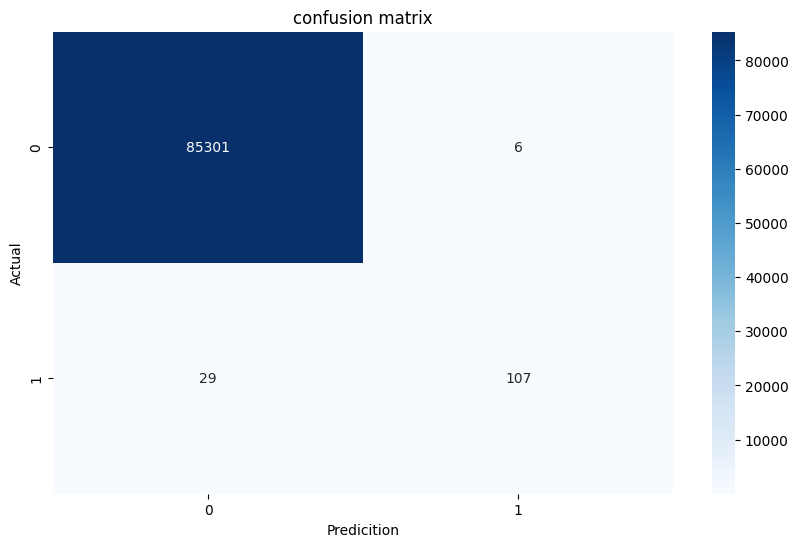

0.8933471858388284


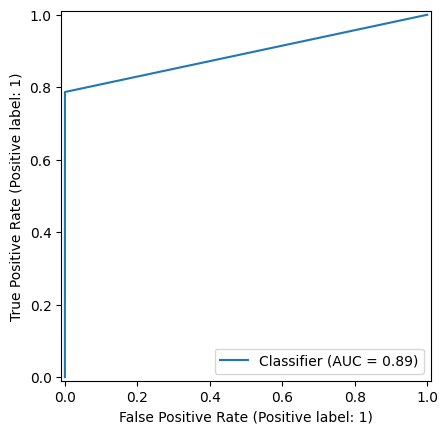

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.79      0.86       136

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=9)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

print("Classifire = RandomForest  &  Accuracy Score",accuracy_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_rf))
RocCurveDisplay.from_predictions(y_test, y_pred_rf)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_s, X_test_s = standardize_features(X_train, X_test)
X_train_s_b, y_train_b = dataset_balancement(X_train_s, y_train)

(398372, 30) (398372,)


Classifire = RandomForest  &  Accuracy Score 0.9993094811745842


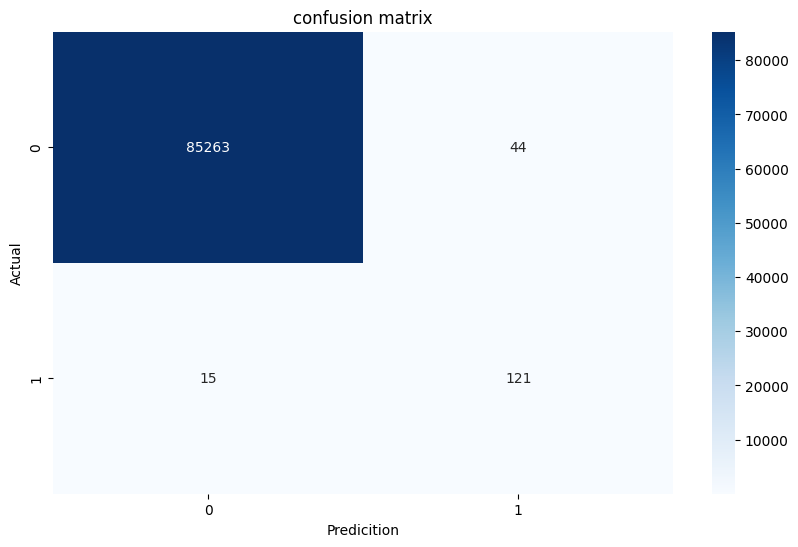

0.9445950490925853


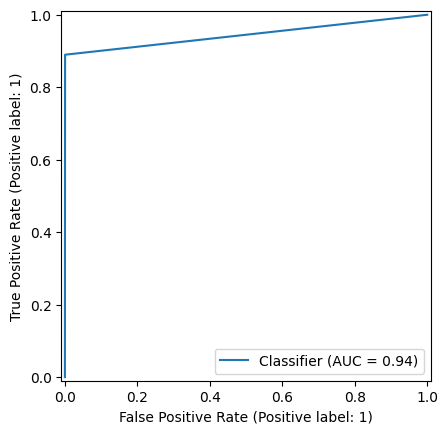

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.89      0.80       136

    accuracy                           1.00     85443
   macro avg       0.87      0.94      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=9)
rf_classifier.fit(X_train_s_b, y_train_b)
y_pred_s_b_rf = rf_classifier.predict(X_test_s)

print("Classifire = RandomForest  &  Accuracy Score",accuracy_score(y_test, y_pred_s_b_rf))
cm = confusion_matrix(y_test, y_pred_s_b_rf)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_s_b_rf))
RocCurveDisplay.from_predictions(y_test, y_pred_s_b_rf)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_s_b_rf))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_s, X_test_s = standardize_features(X_train, X_test)
X_train_s_b, y_train_b = dataset_balancement(X_train_s, y_train)

(398372, 30) (398372,)


In [37]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
depth = range(1, 30)
precision_scores = []
recall_scores = []

for d in depth:
    clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=d)
    clf.fit(X_train_s_b, y_train_b)
    y_pred = clf.predict(X_test_s)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

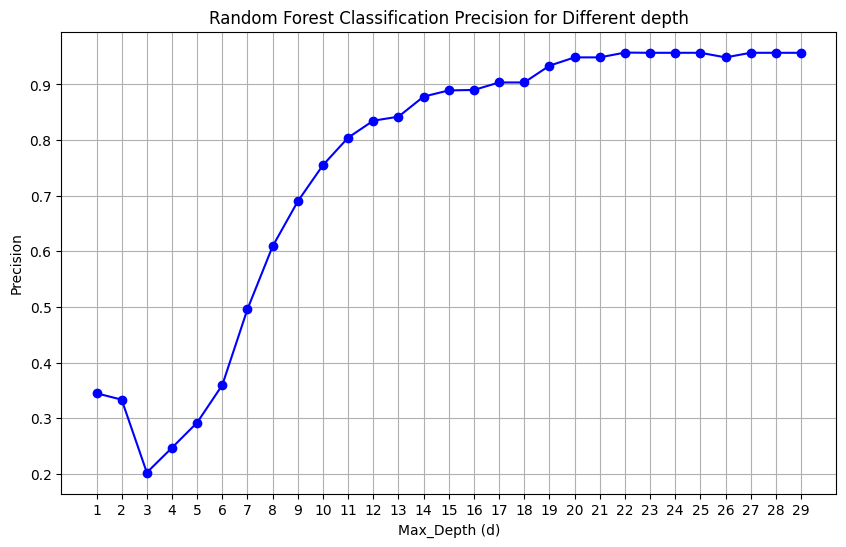

In [ ]:
# Plotting Precision
plt.figure(figsize=(10, 6))
plt.plot(depth, precision_scores, marker='o', linestyle='-', color='b')
plt.title('Random Forest Classification Precision for Different depth')
plt.xlabel('Max_Depth (d)')
plt.ylabel('Precision')
plt.xticks(depth)
plt.grid(True)
plt.show()

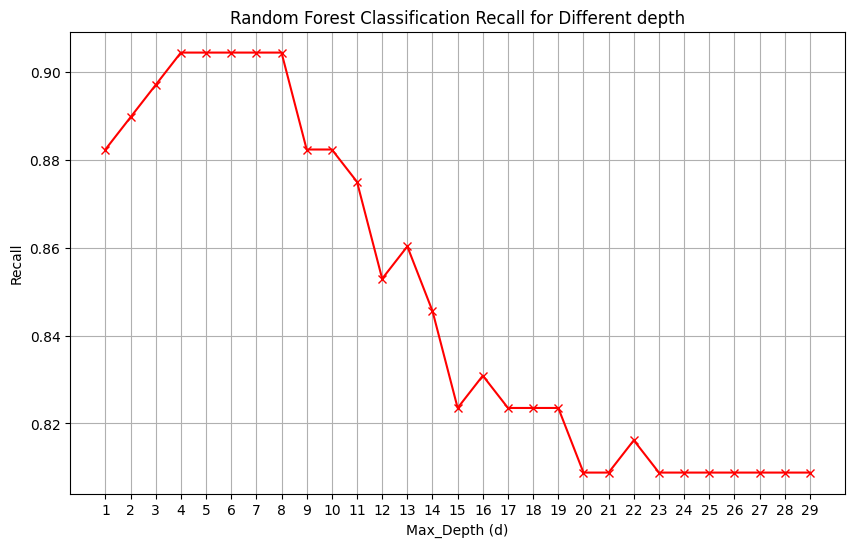

In [ ]:
# Plotting Recall
plt.figure(figsize=(10, 6))
plt.plot(depth, recall_scores, marker='x', linestyle='-', color='r')
plt.title('Random Forest Classification Recall for Different depth')
plt.xlabel('Max_Depth (d)')
plt.ylabel('Recall')
plt.xticks(depth)
plt.grid(True)
plt.show()

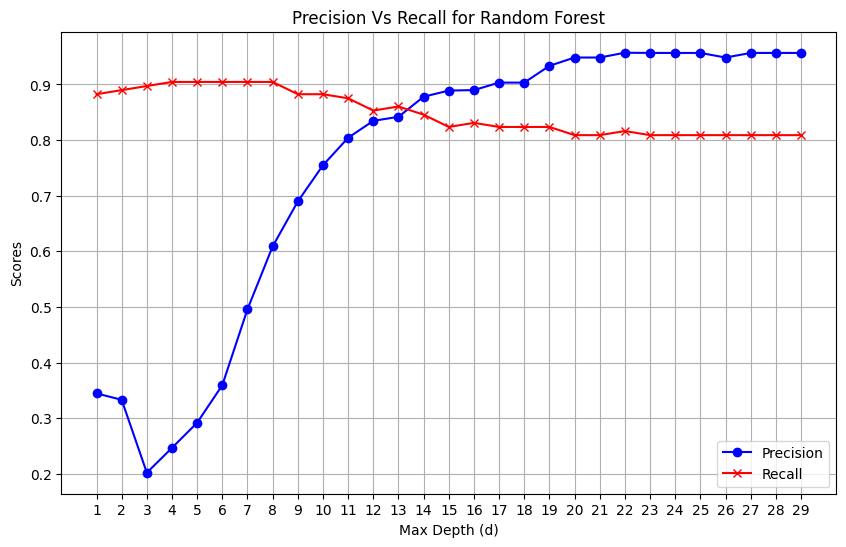

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(depth, precision_scores, marker='o', linestyle='-', color='b', label='Precision')
plt.plot(depth, recall_scores, marker='x', linestyle='-', color='r', label='Recall')
plt.title('Precision Vs Recall for Random Forest')
plt.xlabel('Max Depth (d)')
plt.ylabel('Scores')
plt.xticks(depth)
plt.grid(True)
plt.legend()
plt.show()

Classifire = RandomForest  &  Accuracy Score 0.9987242957293166


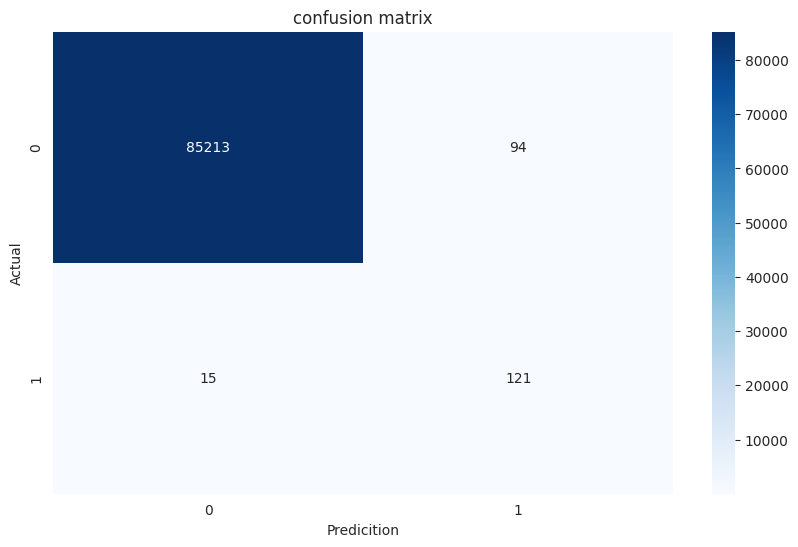

0.9443019899063521


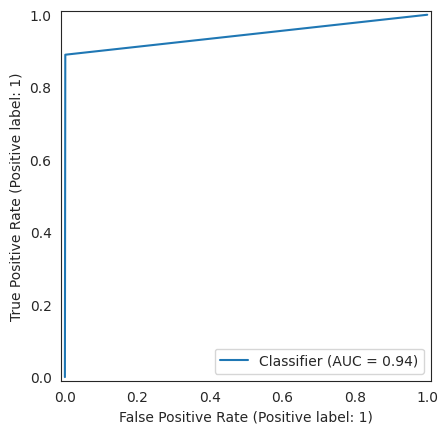

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.56      0.89      0.69       136

    accuracy                           1.00     85443
   macro avg       0.78      0.94      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [62]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)
rf_classifier.fit(X_train_s_b, y_train_b)
y_pred_s_b_rf = rf_classifier.predict(X_test_s)

print("Classifire = RandomForest  &  Accuracy Score",accuracy_score(y_test, y_pred_s_b_rf))
cm = confusion_matrix(y_test, y_pred_s_b_rf)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, y_pred_s_b_rf))
RocCurveDisplay.from_predictions(y_test, y_pred_s_b_rf)
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_s_b_rf))

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_s, X_test_s = standardize_features(X_train, X_test)

Classifire = RandomForest  &  Accuracy Score 0.9784651756141521


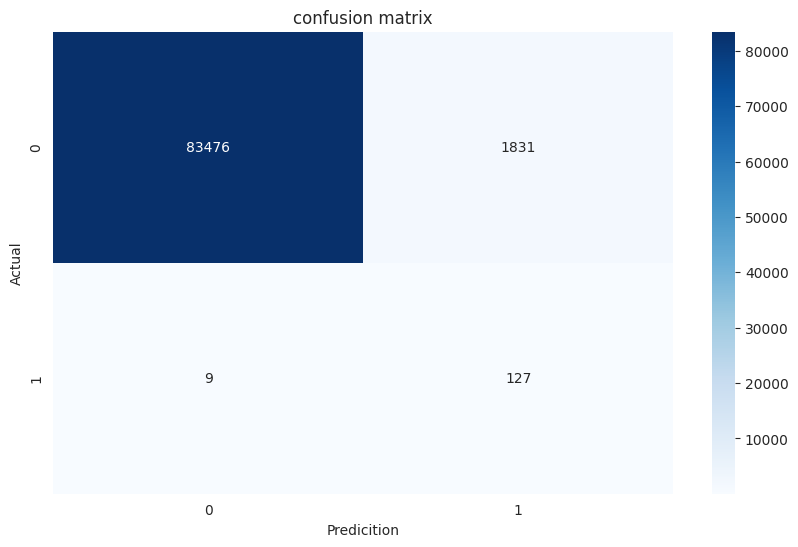

0.9561799373060207


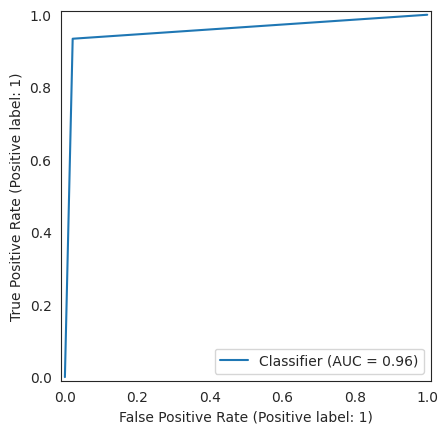

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.12       136

    accuracy                           0.98     85443
   macro avg       0.53      0.96      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [67]:
model = make_pipeline(
    RandomUnderSampler(random_state=42, sampling_strategy='majority'),
    #SMOTE(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)
)

model.fit(X_train_s, y_train)
pred_s = model.predict(X_test_s)

print("Classifire = RandomForest  &  Accuracy Score",accuracy_score(y_test, pred_s))
cm = confusion_matrix(y_test, pred_s)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , cmap="Blues", fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()
print(roc_auc_score(y_test, pred_s))
RocCurveDisplay.from_predictions(y_test, pred_s)
plt.show()
print("Classification Report:")
print(classification_report(y_test, pred_s))